# (2주차) 9월9일
>path, 이미지 크롤링

- toc:true
- branch: master
- badges: true
- comments: true
- author: 윤도현

### import

In [2]:
from fastai.data.all import *
from fastai.vision.all import *

### Path

In [2]:
path= Path() #Path 클래스에서 인스턴스 생성 

In [3]:
pwd

'C:\\Users\\user'

In [5]:
path.ls()

(#57) [Path('.cache'),Path('.conda'),Path('.fastai'),Path('.gitconfig'),Path('.ipynb_checkpoints'),Path('.ipython'),Path('.jupyter'),Path('.keras'),Path('.matplotlib'),Path('.python_history')...]

In [6]:
path = Path('/')

In [7]:
path.ls()

(#23) [Path('/$Recycle.Bin'),Path('/$WINDOWS.~BT'),Path('/$Windows.~WS'),Path('/$WinREAgent'),Path('/Documents and Settings'),Path('/DumpStack.log.tmp'),Path('/ESD'),Path('/git'),Path('/hiberfil.sys'),Path('/INNORIX_EX')...]

## 폴더 만들기

In [8]:
path= Path()

In [9]:
(path/'abc').mkdir()

In [10]:
(path/'abc').ls()

(#0) []

## 이미 폴더가 존재하는 경우에 아래와 같이 에러가 발생

In [11]:
(path/'abc').mkdir()

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'abc'

In [12]:
(path/'abc').mkdir(exist_ok=true)

### 생성한 폴더를 지우는 방법

In [13]:
(path/'abc').rmdir()

### 이미지 크롤링 ###

- 이미지 크롤링은 (1)검색 (2) 이미지 주소 찾기 (3) 해당 주소로 이동하여 저장하는 과정 반복

`-` 교재: 빙을 이용하여 이미지 크롤링
    - 애져에 가입, 완전무료 아님
    
`-` 덕덕고를 이용한 이미지 크롤링
    -https://github.com/fastai/fastbook/blob/master/utils.py

In [3]:
def search_images_ddg(key,max_n=200):
     """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
     """
     url        = 'https://duckduckgo.com/'
     params     = {'q':key}
     res        = requests.post(url,data=params)
     searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
     if not searchObj: print('Token Parsing Failed !'); return
     requestUrl = url + 'i.js'
     headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
     params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
     urls       = []
     while True:
         try:
             res  = requests.get(requestUrl,headers=headers,params=params)
             data = json.loads(res.text)
             for obj in data['results']:
                 urls.append(obj['image'])
                 max_n = max_n - 1
                 if max_n < 1: return L(set(urls))     # dedupe
             if 'next' not in data: return L(set(urls))
             requestUrl = url + data['next']
         except:
             pass

### search_images_ddg(검색어) 를 이용하여 검색어에 해당하는 url 얻기

In [15]:
search_images_ddg('jyp',max_n=10)

(#10) ['https://6.viki.io/image/3099ddeee3b345428df04a0cdd1148ef.jpeg?s=900x600&e=t','http://www.asianjunkie.com/wp-content/uploads/2016/02/JYP.jpg','https://2.bp.blogspot.com/-O1uZBD8r4Pg/U-Zn40mX2AI/AAAAAAAAwpQ/OSv4Xwu7UIM/s1600/1407579762778.jpg','https://cdn.kstarlive.com/image/1575249516405-77196572_965573460488693_4497485671011708735_n(1).jpg','https://koreaboo-cdn.storage.googleapis.com/2017/08/jyp.jpg','http://cdn.koreaboo.com/wp-content/uploads/2016/05/jyp-4.jpg','https://3.bp.blogspot.com/-SBvJVoVbwoo/VNzm6aIkOxI/AAAAAAAAPxE/T1EiU4haUx8/s1600/jyp.jpg','http://4.bp.blogspot.com/-iqM6LYPot1c/VbcMC6kJ3-I/AAAAAAAAHNc/NExuVdL6CcM/s1600/jyp.jpg','https://liquipedia.net/commons/images/c/c6/JYP_hsc4.jpg','https://image.kpopmap.com/2020/03/02f747340ad50199370a3480df0e9f14.jpg']

### download_images(저장하고싶은폴더위치, url의리스트) 를 이용하여 url에 해당하는 이미지를 저장하고 싶은 폴더에 저장

In [40]:
path= Path()

In [41]:
(path/'crolling').mkdir(exist_ok=true)

In [42]:
path=Path('crolling')

In [43]:
path.ls()

(#11) [Path('crolling/.ipynb_checkpoints'),Path('crolling/00000000.jpeg'),Path('crolling/00000001.jpg'),Path('crolling/00000002.jpg'),Path('crolling/00000003.jpg'),Path('crolling/00000004.jpg'),Path('crolling/00000005.jpg'),Path('crolling/00000006.jpg'),Path('crolling/00000007.jpg'),Path('crolling/00000008.jpg')...]

In [44]:
download_images(path,urls=search_images_ddg('jyp',max_n=10))

### 10개의 파일 저장됨 

In [169]:
keywords = '박재범' , '박진영'
path= Path('singer')

In [170]:
if not path.exists(): #현재 폴더에 image 이라는 폴더가 있는지 체크
    path.mkdir()      #현재 폴더에 image 이라는 폴더가 만들어짐
    for keyword in keywords:  #keyword='박재범' , keyword='박진영' 일때 아래내용을 반복
        lastpath=path/keyword #./image/iu  또는 ./image/jyp 
        lastpath.mkdir(exist_ok=true) # make ./image/iu 또는 ./image/jyp 
        urls=search_images_ddg(keyword)  # 'iu' 검색어로 url들의 리스트 얻는과정
        download_images(lastpath,urls=urls) # 그 url에 해당하는 이미지들을 ./image/iu 또는 ./image/jyp 폴더에 저장

### Cleaning Data

`-` 탐색기로 파일들을 살펴보니 조금 이상한 확장자가 있음.

`-` 조금 이상해 보이는 확장자도 열리기는 함

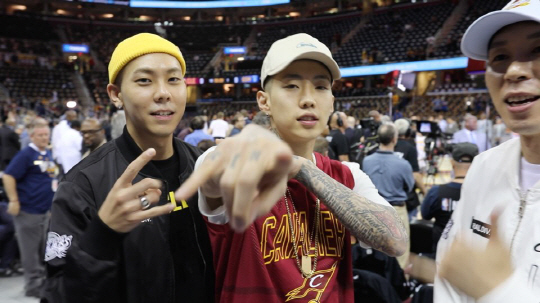

In [4]:
PILImage.create('./singer/jpark/00000000.jpg')

In [5]:
path=Path('singer')

In [6]:
path

Path('singer')

In [7]:
verify_images(get_image_files(path))

(#0) []

`-` 위에 해당하는 이미지를 수동을 지워줬음

`-` csv을 받았으면 데이터프레임을 만들어야 하듯이, 이미지 파일들을 받았으면 데이터로더스를 만들어야 fastai가 지원하는 함수로 분석하기 좋다.

In [8]:
dls = ImageDataLoaders.from_folder(
    path,
    train='singer',
    valid_pct=0.2,
    item_tfms=Resize(224))
    

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


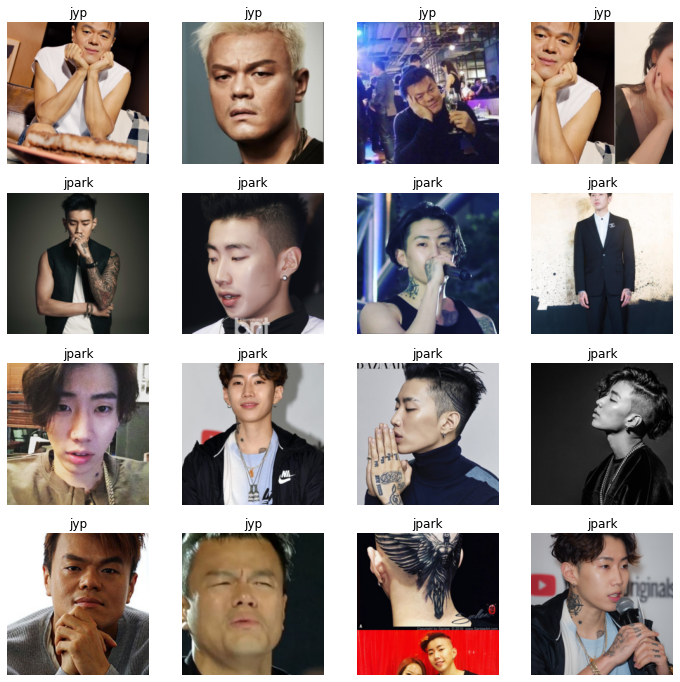

In [9]:
dls.show_batch(max_n=16)

In [10]:
import gc
gc.collect()
torch.cuda.empty_cache()

### 모형을 만들고 학습을 시키자. 

In [11]:
learn = cnn_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(7)

C:\Users\user\anaconda3\envs\bda2021\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


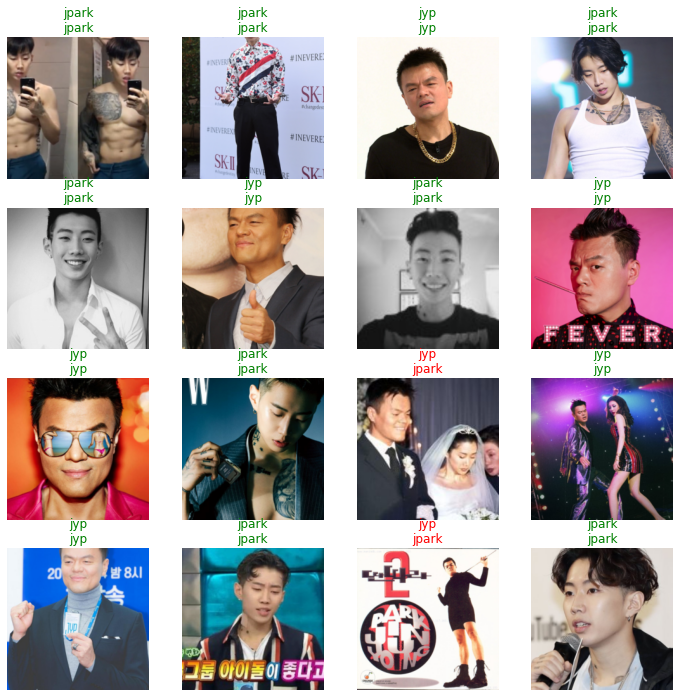

In [12]:
learn.show_results(max_n =16)

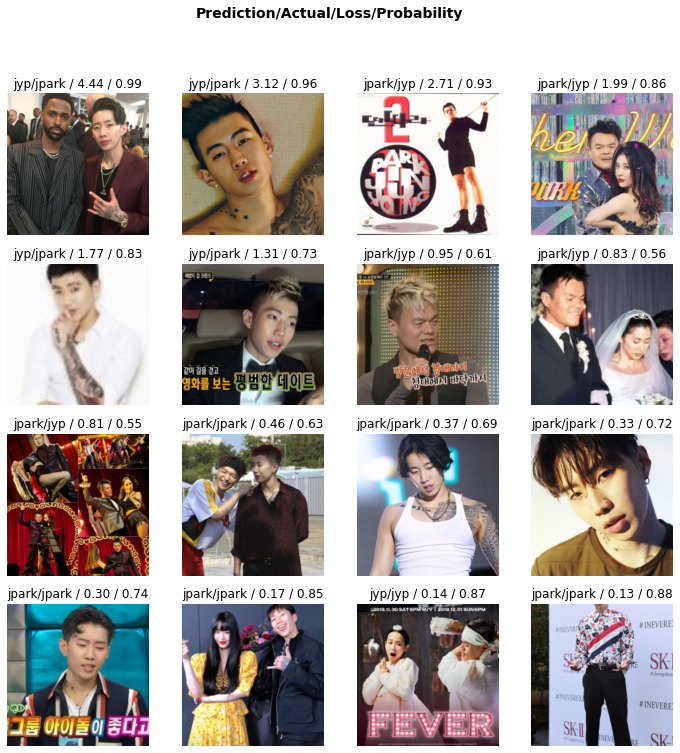

In [13]:
interp =Interpretation.from_learner(learn)
interp.plot_top_losses(16)

`-` 수동으로 특정 observation에 대한 예측 결과를 확인해보자

In [128]:
dls.train_ds

(#278) [(PILImage mode=RGB size=802x1200, TensorCategory(0)),(PILImage mode=RGB size=450x312, TensorCategory(1)),(PILImage mode=RGB size=650x975, TensorCategory(0)),(PILImage mode=RGB size=1200x630, TensorCategory(1)),(PILImage mode=RGB size=1000x563, TensorCategory(1)),(PILImage mode=RGB size=540x722, TensorCategory(1)),(PILImage mode=RGB size=900x600, TensorCategory(1)),(PILImage mode=RGB size=780x410, TensorCategory(1)),(PILImage mode=RGB size=1200x850, TensorCategory(0)),(PILImage mode=RGB size=1278x1920, TensorCategory(0))...]

In [130]:
dls.train_ds[11]

(PILImage mode=RGB size=750x350, TensorCategory(1))

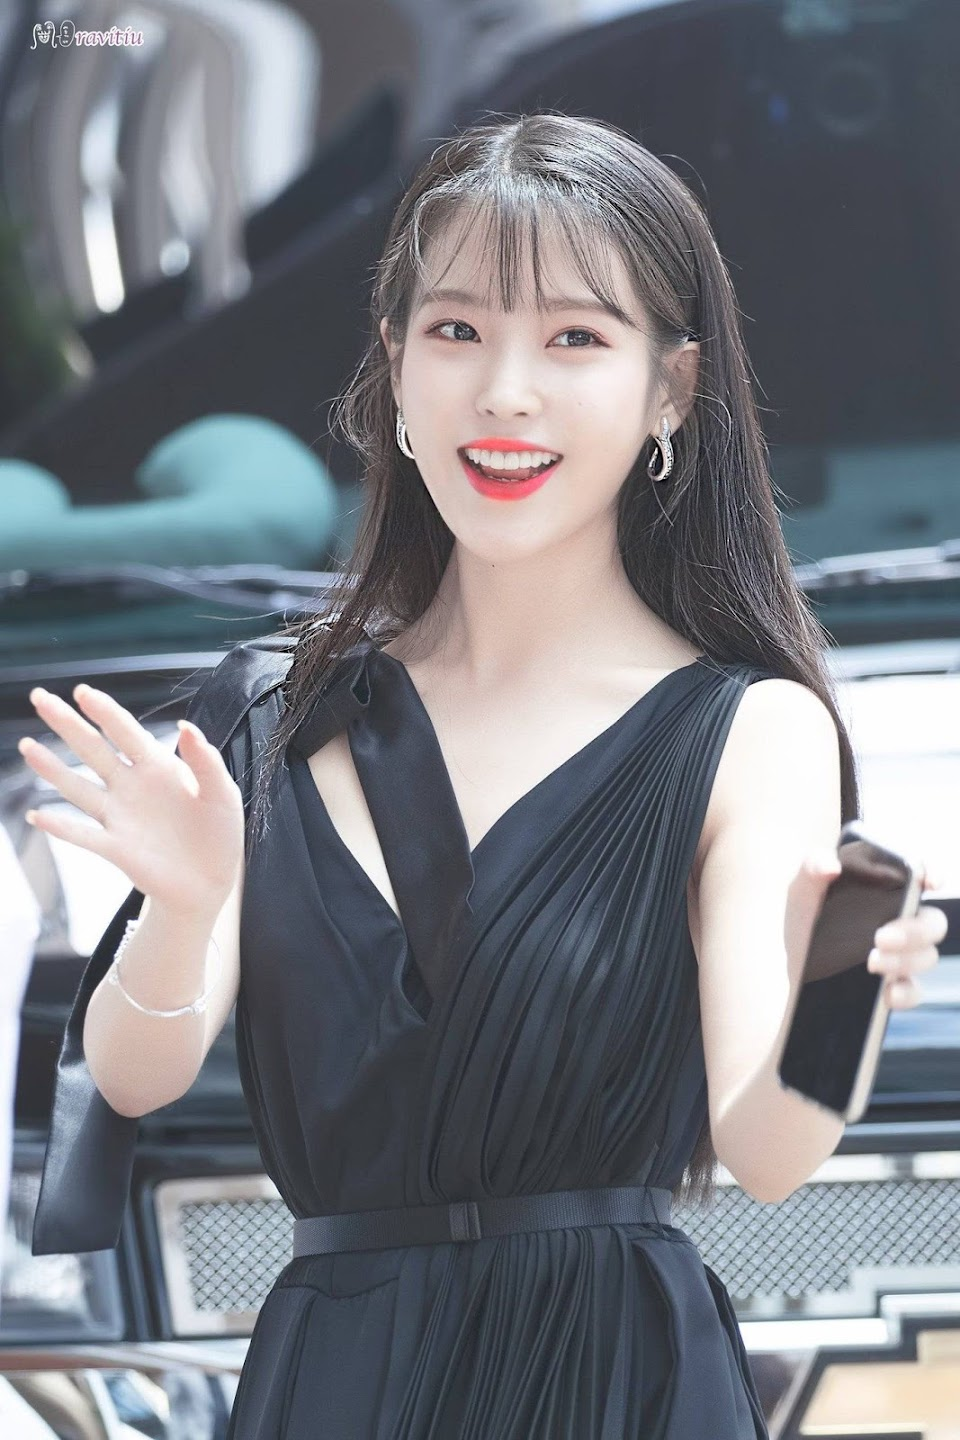

In [140]:
dls.train_ds[221][0]

In [139]:
dls.train_ds[221][1]

TensorCategory(0)

In [142]:
dls.train_ds[221]

(PILImage mode=RGB size=960x1440, TensorCategory(0))

In [143]:
x221 = dls.train_ds[210][0]

In [146]:
learn.predict(x221)

('jyp', tensor(1), tensor([4.6161e-04, 9.9954e-01]))

### Test

In [161]:
path=Path()

In [162]:
if not (path/'test3').exists():
    (path/'test3').mkdir()

In [163]:
urls=search_images_ddg('iu 아이유',max_n=20)
download_images(path/'test2',urls=urls)
testset=get_image_files(path/'test2')
testset

(#20) [Path('test2/00000000.jpg'),Path('test2/00000001.jpg'),Path('test2/00000002.jpg'),Path('test2/00000003.jpg'),Path('test2/00000004.jpg'),Path('test2/00000005.jpg'),Path('test2/00000006.jpg'),Path('test2/00000007.jpg'),Path('test2/00000008.jpg'),Path('test2/00000009.jpg')...]

In [164]:
for i in range(len(testset)):
    print(learn.predict(PILImage.create(testset[i])))

('iu', tensor(0), tensor([1.0000e+00, 9.2330e-07]))


('iu', tensor(0), tensor([1.0000e+00, 2.7364e-06]))


('iu', tensor(0), tensor([0.9983, 0.0017]))


('iu', tensor(0), tensor([0.9941, 0.0059]))


('iu', tensor(0), tensor([0.6974, 0.3026]))


('iu', tensor(0), tensor([9.9999e-01, 1.4006e-05]))


('iu', tensor(0), tensor([9.9963e-01, 3.7171e-04]))


('iu', tensor(0), tensor([9.9996e-01, 3.8879e-05]))


('jyp', tensor(1), tensor([0.0379, 0.9621]))


('iu', tensor(0), tensor([1.0000e+00, 4.7531e-07]))


('iu', tensor(0), tensor([1.0000e+00, 1.0026e-06]))


('iu', tensor(0), tensor([0.9925, 0.0075]))


('iu', tensor(0), tensor([9.9949e-01, 5.0996e-04]))


('iu', tensor(0), tensor([1.0000e+00, 1.7402e-07]))


('iu', tensor(0), tensor([1.0000e+00, 7.5454e-07]))


('iu', tensor(0), tensor([9.9997e-01, 2.5955e-05]))


('iu', tensor(0), tensor([9.9999e-01, 1.3213e-05]))


('iu', tensor(0), tensor([0.9974, 0.0026]))


('iu', tensor(0), tensor([9.9933e-01, 6.7468e-04]))


('iu', tensor(0), tensor([9.9925e-01, 7.4602e-04]))
